In [ ]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt


torch.__version__

'2.9.0+cpu'

In [ ]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X+bias

X[:10], y[:10]



(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
train_split = int(0.8 * len(X)) # .8 for training other .2 for testing

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

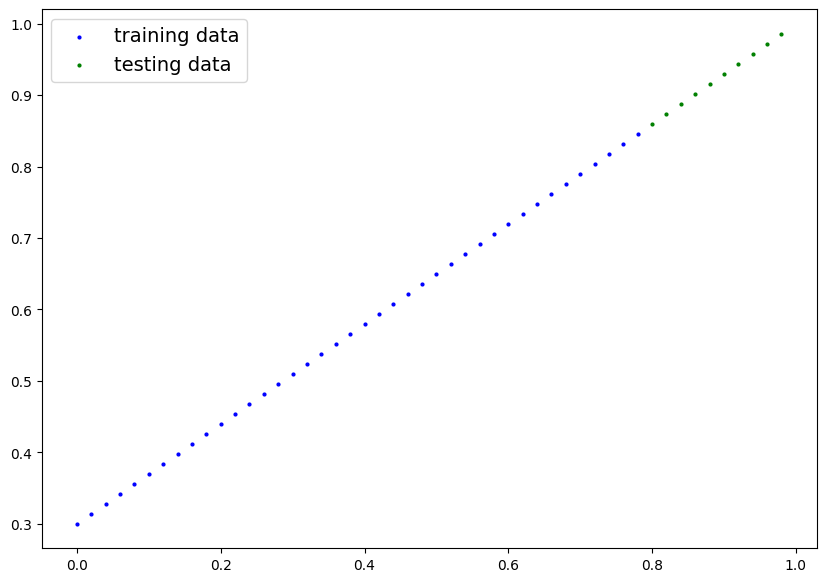

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):

  #plot training data then tests and compares

  plt.figure(figsize=(10, 7))

  plt.scatter(train_data, train_labels, c='b', s=4, label="training data")
  plt.scatter(test_data, test_labels, c='g', s=4, label="testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=4, label="predictions")

  plt.legend(prop={"size" : 14});
plot_predictions()

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True) # Fixed typo

    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True) # Fixed typo

  def forward(self, x: torch.tensor) -> torch.tensor:
    return self.weights*x*self.bias

torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.0347],
        [0.0356],
        [0.0364],
        [0.0373],
        [0.0382],
        [0.0390],
        [0.0399],
        [0.0408],
        [0.0416],
        [0.0425]])


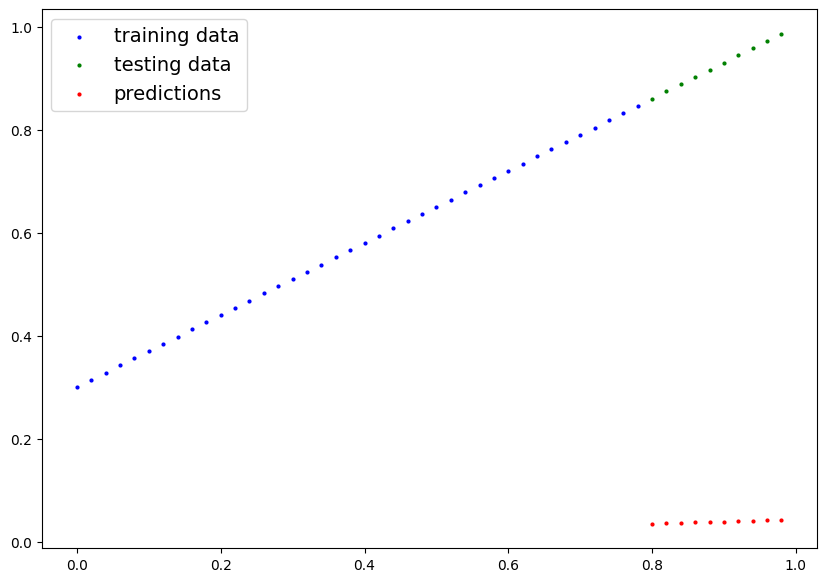

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
y_test - y_preds

tensor([[0.8253],
        [0.8384],
        [0.8516],
        [0.8647],
        [0.8778],
        [0.8910],
        [0.9041],
        [0.9172],
        [0.9304],
        [0.9435]])

In [ ]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [ ]:
#training loop

epoch_count = []
train_loss_values = []
test_loss_values = []

epochs = 100

for epoch in range(1, epochs+1):
  model_0.train()

  y_pred = model_0(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()



  #testing

  model_0.eval()

  with torch.inference_mode():

    #forward pass
    test_pred = model_0(X_test)

    #calculate loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch%10 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(loss.item())
    test_loss_values.append(test_loss.item())

    print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss} ")

Epoch: 10 | Train loss: 0.554266631603241 | Test loss: 0.8797756433486938 
Epoch: 20 | Train loss: 0.5521367788314819 | Test loss: 0.8748877644538879 
Epoch: 30 | Train loss: 0.5498806834220886 | Test loss: 0.8697085380554199 
Epoch: 40 | Train loss: 0.5474845170974731 | Test loss: 0.8642066717147827 
Epoch: 50 | Train loss: 0.5449337363243103 | Test loss: 0.858348548412323 
Epoch: 60 | Train loss: 0.5422130227088928 | Test loss: 0.852098822593689 
Epoch: 70 | Train loss: 0.5393056869506836 | Test loss: 0.8454195261001587 
Epoch: 80 | Train loss: 0.5361942052841187 | Test loss: 0.8382700085639954 
Epoch: 90 | Train loss: 0.5328596830368042 | Test loss: 0.8306069374084473 
Epoch: 100 | Train loss: 0.5292817950248718 | Test loss: 0.8223839998245239 


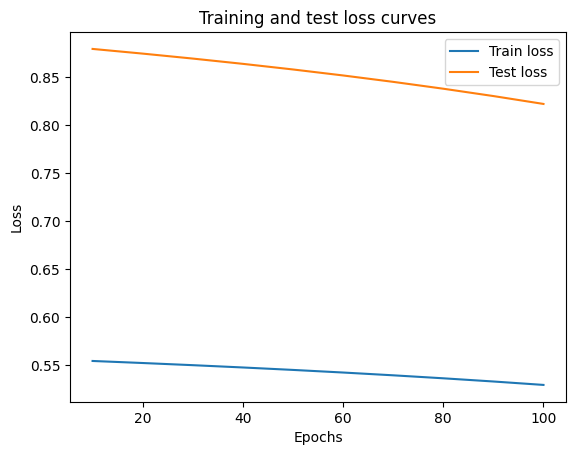

In [ ]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
print("The model learned the following values for weights and bias: ")
print(model_0.state_dict())
print("\nThese are the original values for weights and bias: ")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias: 
OrderedDict({'weights': tensor([0.4138]), 'bias': tensor([0.2732])})

These are the original values for weights and bias: 
weights: 0.7, bias: 0.3


In [ ]:
model_0.eval()

with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.0904],
        [0.0927],
        [0.0950],
        [0.0972],
        [0.0995],
        [0.1017],
        [0.1040],
        [0.1063],
        [0.1085],
        [0.1108]])

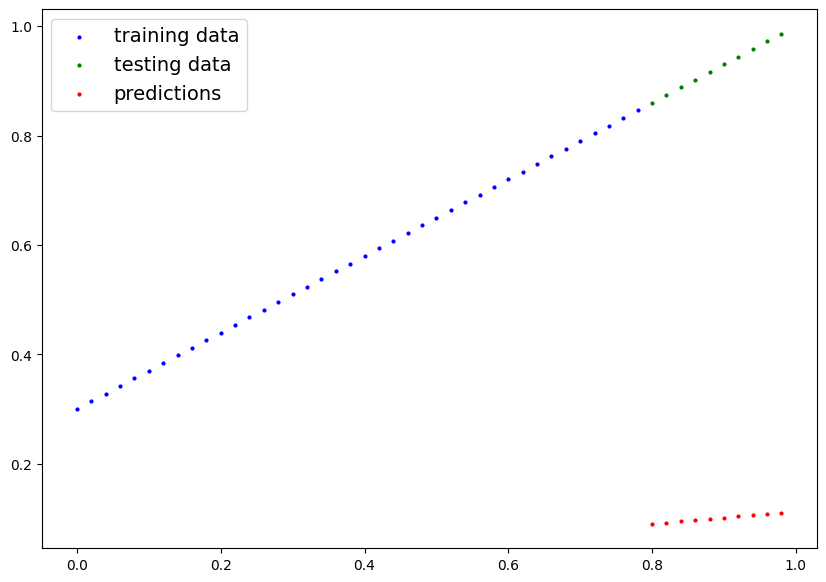

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = '01_pytorch_workflow_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),# only saving the state_dict() only saves the models learned parameters
f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [ ]:
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r-- 1 root root 2117 Dec 17 08:26 models/01_pytorch_workflow_model_0.pth


In [ ]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.state_dict(torch.load(f=MODEL_SAVE_PATH))

/tmp/ipython-input-629947842.py:2: FutureWarning: Positional args are being deprecated, use kwargs instead. Refer to https://pytorch.org/docs/main/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  loaded_model_0.state_dict(torch.load(f=MODEL_SAVE_PATH))


OrderedDict([('weights', tensor([0.2345])), ('bias', tensor([0.2303]))])

In [ ]:
loaded_model_0.eval()

with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

In [ ]:
print(y_preds)
print(loaded_model_preds)

tensor([[0.0904],
        [0.0927],
        [0.0950],
        [0.0972],
        [0.0995],
        [0.1017],
        [0.1040],
        [0.1063],
        [0.1085],
        [0.1108]])
tensor([[0.0432],
        [0.0443],
        [0.0454],
        [0.0464],
        [0.0475],
        [0.0486],
        [0.0497],
        [0.0508],
        [0.0518],
        [0.0529]])
